In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score

In [2]:
df = pd.read_csv('iris_dataset.csv')
target_names = df.species.unique()
df['species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2], inplace=True)

df

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']

X = np.array(X)
y = np.array(y)

#X_train, X_test, y_train, y_test = train_test_split(
    #X, y, random_state=0)

In [4]:
clf = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
clf.fit(X, y)
#clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

In [5]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

The binary tree structure has 9 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 1] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 1] <= 1.75 else to node 4.
		node=3 is a split node: go to node 5 if X[:, 0] <= 4.950000047683716 else to node 6.
		node=4 is a leaf node.
			node=5 is a split node: go to node 7 if X[:, 1] <= 1.6500000357627869 else to node 8.
			node=6 is a leaf node.
				node=7 is a leaf node.
				node=8 is a leaf node.


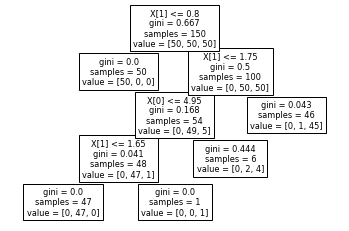

In [6]:
tree.plot_tree(clf)
plt.show()

In [7]:
from sklearn.tree import export_graphviz

#tree = DecisionTreeClassifier(random_state=0)
#tree.fit(X_train, y_train)


tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)
#tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree.dot", class_names= target_names,
                 impurity=False, filled=True)

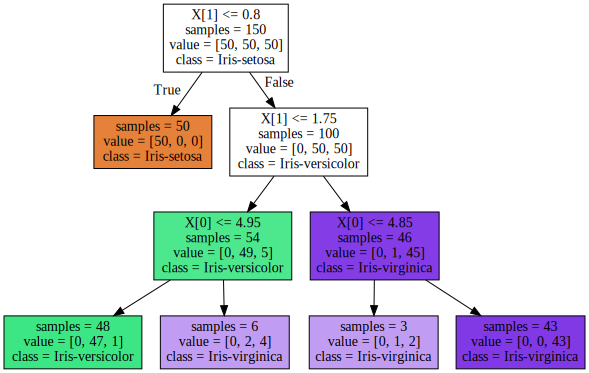

In [8]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

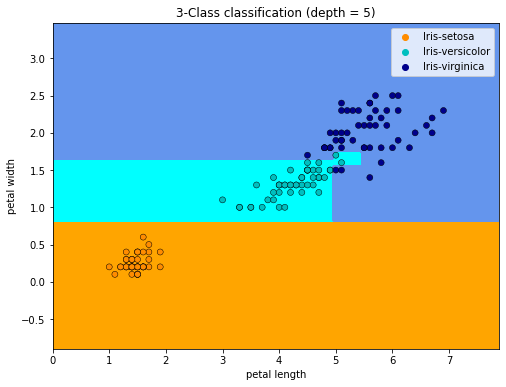

In [9]:
#X = np.array(X_train)
#y = np.array(y_train)

max_depth = 5 
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']


# create an instance of decision tree and fit the data.
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X, y)
#tree.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (depth = %i)"
          % (max_depth))
plt.xlabel("petal length")
plt.ylabel("petal width")

plt.show()

In [10]:
print(precision_score(y, tree.predict(X), average='weighted'))
print(recall_score(y, tree.predict(X), average='weighted'))
print(confusion_matrix(y, tree.predict(X)))

0.9934640522875816
0.9933333333333333
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
